<a href="https://colab.research.google.com/github/Manmeetkaur17/Hex_Analyzing_and_Visualizing_Movie_Ratings/blob/main/Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


***Load DataSet***

In [45]:
df=pd.read_csv('movies.csv')

***EDA***

In [46]:
df.shape

(1000, 16)

In [47]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [48]:
df.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [49]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [51]:
df['Gross']=df['Gross'].str.replace(',', '').astype(float)

In [52]:
df['Gross']=df['Gross'].fillna(df['Gross'].mean())
df['Meta_score']=df['Meta_score'].fillna(df['Meta_score'].mean())

In [53]:
df.drop('Certificate',inplace=True, axis=1)

In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     1000 non-null   float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          1000 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 117.3+ KB


In [ ]:
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False).astype(int)

In [ ]:
df.info()

In [58]:
#Dispplay title of movie having runtime >=180

print(df[df['Runtime']>=180]['Series_Title'])


3                             The Godfather: Part II
5      The Lord of the Rings: The Return of the King
7                                   Schindler's List
25                                    The Green Mile
31                              Shichinin no samurai
59                                 Avengers: Endgame
71                       Once Upon a Time in America
116                               Lawrence of Arabia
139                               Bhaag Milkha Bhaag
140                               Gangs of Wasseypur
147                          The Wolf of Wall Street
156                           Swades: We, the People
177                                           Sholay
206                                       Kis Uykusu
240                                   Dil Chahta Hai
247                Lagaan: Once Upon a Time in India
258                      Dilwale Dulhania Le Jayenge
274                              Fanny och Alexander
278                                  The Deer 

The highest average voting in the year

In [69]:
df.groupby('Released_Year')['No_of_Votes'].mean().sort_values(ascending=False)

,No_of_Votes
Released_Year,
1994,666532.153846
1977,556087.333333
1999,536961.058824
2008,444044.904762
2010,431661.173913
...,...
1928,38940.500000
1947,37204.500000
1945,34575.000000


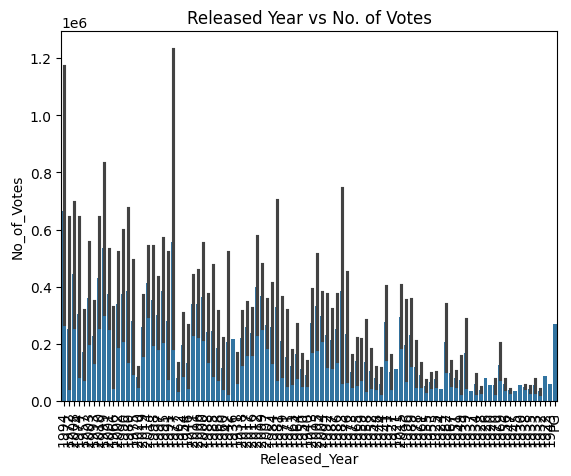

In [77]:
sns.barplot(x='Released_Year', y='No_of_Votes', data=df)
plt.title('Released Year vs No. of Votes')
plt.xticks(rotation=90)
plt.show()

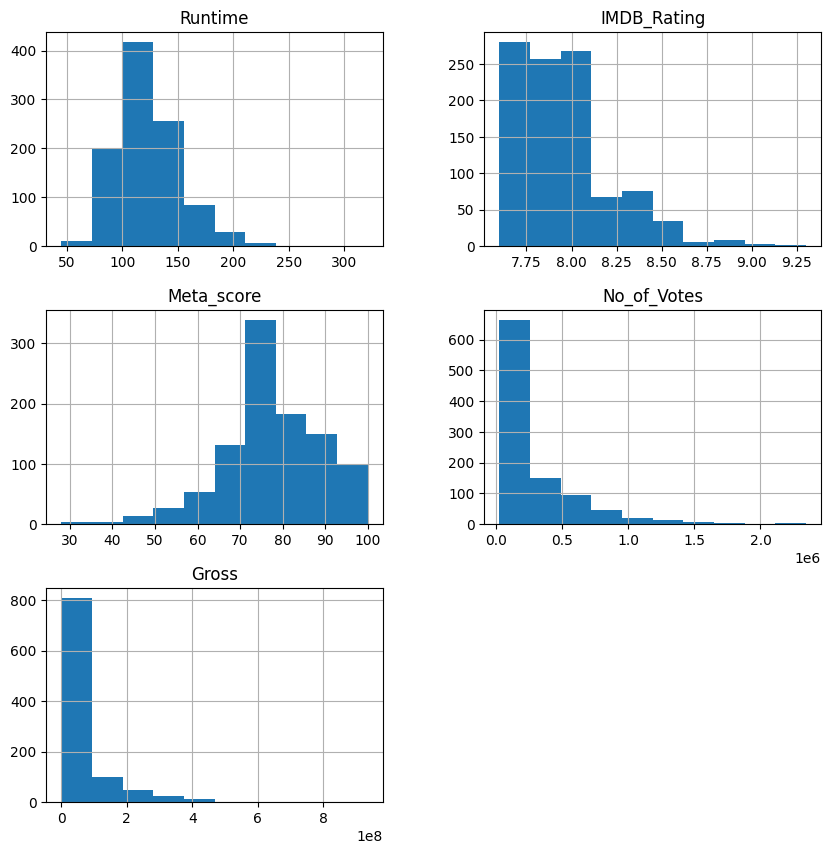

In [61]:
#Histograph
df.hist(figsize=(10, 10))
plt.show()

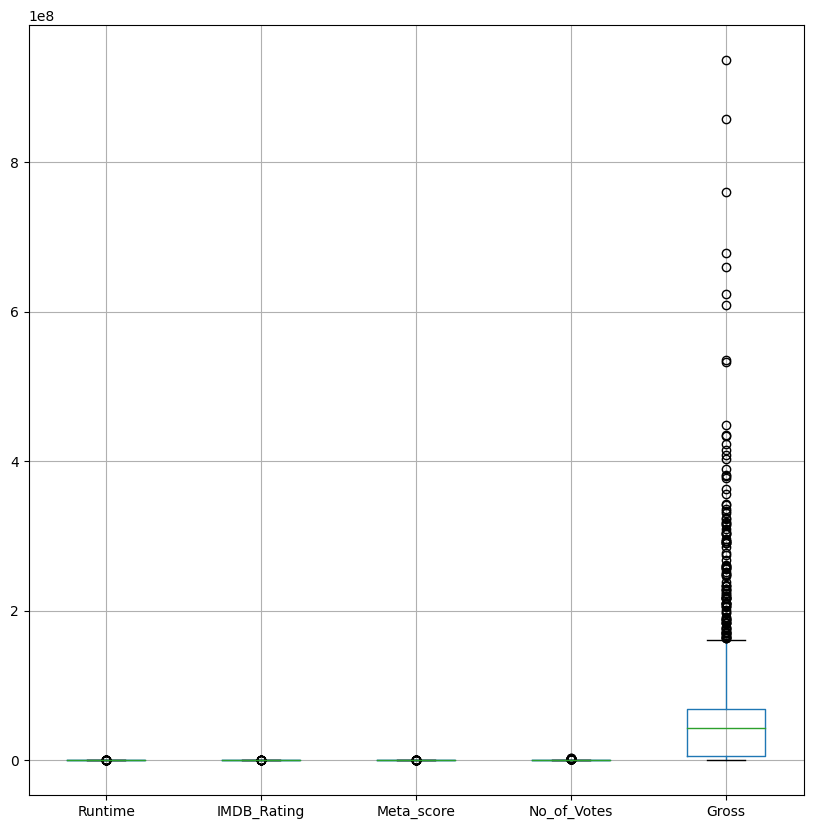

In [62]:
# boxplot
df.boxplot(figsize=(10, 10))
plt.show()